In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


100%|██████████| 13/13 [02:16<00:00, 10.52s/it]


Epoch [1/100] | Generator Loss: 0.0795


100%|██████████| 13/13 [01:00<00:00,  4.67s/it]


Epoch [2/100] | Generator Loss: 0.0233


100%|██████████| 13/13 [01:01<00:00,  4.70s/it]


Epoch [3/100] | Generator Loss: 0.0152


100%|██████████| 13/13 [00:54<00:00,  4.23s/it]


Epoch [4/100] | Generator Loss: 0.0129


100%|██████████| 13/13 [00:58<00:00,  4.47s/it]


Epoch [5/100] | Generator Loss: 0.0080


100%|██████████| 13/13 [01:06<00:00,  5.12s/it]


Epoch [6/100] | Generator Loss: 0.0096


100%|██████████| 13/13 [00:58<00:00,  4.52s/it]


Epoch [7/100] | Generator Loss: 0.0124


100%|██████████| 13/13 [01:00<00:00,  4.67s/it]


Epoch [8/100] | Generator Loss: 0.0112


100%|██████████| 13/13 [01:02<00:00,  4.78s/it]


Epoch [9/100] | Generator Loss: 0.0079


100%|██████████| 13/13 [00:58<00:00,  4.52s/it]


Epoch [10/100] | Generator Loss: 0.0054


100%|██████████| 13/13 [00:59<00:00,  4.56s/it]


Epoch [11/100] | Generator Loss: 0.0058


100%|██████████| 13/13 [00:59<00:00,  4.59s/it]


Epoch [12/100] | Generator Loss: 0.0063


100%|██████████| 13/13 [00:59<00:00,  4.59s/it]


Epoch [13/100] | Generator Loss: 0.0066


100%|██████████| 13/13 [01:02<00:00,  4.84s/it]


Epoch [14/100] | Generator Loss: 0.0062


100%|██████████| 13/13 [03:44<00:00, 17.31s/it]


Epoch [15/100] | Generator Loss: 0.0053


100%|██████████| 13/13 [00:54<00:00,  4.21s/it]


Epoch [16/100] | Generator Loss: 0.0065


100%|██████████| 13/13 [00:26<00:00,  2.02s/it]


Epoch [17/100] | Generator Loss: 0.0060


100%|██████████| 13/13 [00:26<00:00,  2.06s/it]


Epoch [18/100] | Generator Loss: 0.0051


100%|██████████| 13/13 [00:25<00:00,  1.99s/it]


Epoch [19/100] | Generator Loss: 0.0037


100%|██████████| 13/13 [00:26<00:00,  2.00s/it]


Epoch [20/100] | Generator Loss: 0.0051


100%|██████████| 13/13 [00:26<00:00,  2.01s/it]


Epoch [21/100] | Generator Loss: 0.0043


100%|██████████| 13/13 [00:26<00:00,  2.01s/it]


Epoch [22/100] | Generator Loss: 0.0049


100%|██████████| 13/13 [00:25<00:00,  1.93s/it]


Epoch [23/100] | Generator Loss: 0.0053


100%|██████████| 13/13 [00:25<00:00,  1.96s/it]


Epoch [24/100] | Generator Loss: 0.0055


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [25/100] | Generator Loss: 0.0040


100%|██████████| 13/13 [00:24<00:00,  1.92s/it]


Epoch [26/100] | Generator Loss: 0.0042


100%|██████████| 13/13 [00:24<00:00,  1.91s/it]


Epoch [27/100] | Generator Loss: 0.0052


100%|██████████| 13/13 [00:29<00:00,  2.27s/it]


Epoch [28/100] | Generator Loss: 0.0040


100%|██████████| 13/13 [00:27<00:00,  2.10s/it]


Epoch [29/100] | Generator Loss: 0.0033


100%|██████████| 13/13 [00:27<00:00,  2.14s/it]


Epoch [30/100] | Generator Loss: 0.0035


100%|██████████| 13/13 [00:29<00:00,  2.24s/it]


Epoch [31/100] | Generator Loss: 0.0054


100%|██████████| 13/13 [00:28<00:00,  2.19s/it]


Epoch [32/100] | Generator Loss: 0.0050


100%|██████████| 13/13 [00:28<00:00,  2.17s/it]


Epoch [33/100] | Generator Loss: 0.0066


100%|██████████| 13/13 [00:28<00:00,  2.19s/it]


Epoch [34/100] | Generator Loss: 0.0030


100%|██████████| 13/13 [00:27<00:00,  2.15s/it]


Epoch [35/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:28<00:00,  2.21s/it]


Epoch [36/100] | Generator Loss: 0.0053


100%|██████████| 13/13 [00:28<00:00,  2.23s/it]


Epoch [37/100] | Generator Loss: 0.0042


100%|██████████| 13/13 [00:28<00:00,  2.21s/it]


Epoch [38/100] | Generator Loss: 0.0043


100%|██████████| 13/13 [00:27<00:00,  2.15s/it]


Epoch [39/100] | Generator Loss: 0.0037


100%|██████████| 13/13 [00:28<00:00,  2.16s/it]


Epoch [40/100] | Generator Loss: 0.0026


100%|██████████| 13/13 [00:28<00:00,  2.16s/it]


Epoch [41/100] | Generator Loss: 0.0036


100%|██████████| 13/13 [00:27<00:00,  2.15s/it]


Epoch [42/100] | Generator Loss: 0.0040


100%|██████████| 13/13 [00:28<00:00,  2.16s/it]


Epoch [43/100] | Generator Loss: 0.0046


100%|██████████| 13/13 [00:28<00:00,  2.17s/it]


Epoch [44/100] | Generator Loss: 0.0037


100%|██████████| 13/13 [00:29<00:00,  2.24s/it]


Epoch [45/100] | Generator Loss: 0.0028


100%|██████████| 13/13 [00:28<00:00,  2.22s/it]


Epoch [46/100] | Generator Loss: 0.0036


100%|██████████| 13/13 [00:28<00:00,  2.17s/it]


Epoch [47/100] | Generator Loss: 0.0048


100%|██████████| 13/13 [00:28<00:00,  2.22s/it]


Epoch [48/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:29<00:00,  2.28s/it]


Epoch [49/100] | Generator Loss: 0.0025


100%|██████████| 13/13 [00:29<00:00,  2.26s/it]


Epoch [50/100] | Generator Loss: 0.0019


100%|██████████| 13/13 [00:30<00:00,  2.38s/it]


Epoch [51/100] | Generator Loss: 0.0042


100%|██████████| 13/13 [00:29<00:00,  2.27s/it]


Epoch [52/100] | Generator Loss: 0.0029


100%|██████████| 13/13 [00:29<00:00,  2.26s/it]


Epoch [53/100] | Generator Loss: 0.0042


100%|██████████| 13/13 [00:29<00:00,  2.31s/it]


Epoch [54/100] | Generator Loss: 0.0035


100%|██████████| 13/13 [00:29<00:00,  2.28s/it]


Epoch [55/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:29<00:00,  2.28s/it]


Epoch [56/100] | Generator Loss: 0.0026


100%|██████████| 13/13 [00:31<00:00,  2.40s/it]


Epoch [57/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:29<00:00,  2.29s/it]


Epoch [58/100] | Generator Loss: 0.0033


100%|██████████| 13/13 [00:31<00:00,  2.39s/it]


Epoch [59/100] | Generator Loss: 0.0020


100%|██████████| 13/13 [00:29<00:00,  2.28s/it]


Epoch [60/100] | Generator Loss: 0.0046


100%|██████████| 13/13 [00:30<00:00,  2.33s/it]


Epoch [61/100] | Generator Loss: 0.0021


100%|██████████| 13/13 [00:29<00:00,  2.29s/it]


Epoch [62/100] | Generator Loss: 0.0027


100%|██████████| 13/13 [00:29<00:00,  2.27s/it]


Epoch [63/100] | Generator Loss: 0.0019


100%|██████████| 13/13 [00:28<00:00,  2.22s/it]


Epoch [64/100] | Generator Loss: 0.0022


100%|██████████| 13/13 [00:29<00:00,  2.27s/it]


Epoch [65/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:28<00:00,  2.17s/it]


Epoch [66/100] | Generator Loss: 0.0034


100%|██████████| 13/13 [00:28<00:00,  2.19s/it]


Epoch [67/100] | Generator Loss: 0.0020


100%|██████████| 13/13 [00:28<00:00,  2.15s/it]


Epoch [68/100] | Generator Loss: 0.0019


100%|██████████| 13/13 [00:27<00:00,  2.15s/it]


Epoch [69/100] | Generator Loss: 0.0021


100%|██████████| 13/13 [00:28<00:00,  2.18s/it]


Epoch [70/100] | Generator Loss: 0.0021


100%|██████████| 13/13 [01:18<00:00,  6.04s/it]


Epoch [71/100] | Generator Loss: 0.0020


100%|██████████| 13/13 [01:47<00:00,  8.24s/it]


Epoch [72/100] | Generator Loss: 0.0025


100%|██████████| 13/13 [01:37<00:00,  7.51s/it]


Epoch [73/100] | Generator Loss: 0.0020


100%|██████████| 13/13 [00:29<00:00,  2.27s/it]


Epoch [74/100] | Generator Loss: 0.0023


100%|██████████| 13/13 [00:30<00:00,  2.31s/it]


Epoch [75/100] | Generator Loss: 0.0034


100%|██████████| 13/13 [00:29<00:00,  2.29s/it]


Epoch [76/100] | Generator Loss: 0.0033


100%|██████████| 13/13 [00:30<00:00,  2.38s/it]


Epoch [77/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:29<00:00,  2.30s/it]


Epoch [78/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:30<00:00,  2.31s/it]


Epoch [79/100] | Generator Loss: 0.0021


100%|██████████| 13/13 [00:30<00:00,  2.38s/it]


Epoch [80/100] | Generator Loss: 0.0014


100%|██████████| 13/13 [00:29<00:00,  2.27s/it]


Epoch [81/100] | Generator Loss: 0.0020


100%|██████████| 13/13 [00:29<00:00,  2.30s/it]


Epoch [82/100] | Generator Loss: 0.0026


100%|██████████| 13/13 [00:29<00:00,  2.30s/it]


Epoch [83/100] | Generator Loss: 0.0026


100%|██████████| 13/13 [00:29<00:00,  2.25s/it]


Epoch [84/100] | Generator Loss: 0.0019


100%|██████████| 13/13 [00:30<00:00,  2.31s/it]


Epoch [85/100] | Generator Loss: 0.0029


100%|██████████| 13/13 [00:38<00:00,  2.98s/it]


Epoch [86/100] | Generator Loss: 0.0023


100%|██████████| 13/13 [00:29<00:00,  2.29s/it]


Epoch [87/100] | Generator Loss: 0.0027


100%|██████████| 13/13 [00:30<00:00,  2.32s/it]


Epoch [88/100] | Generator Loss: 0.0034


100%|██████████| 13/13 [00:30<00:00,  2.38s/it]


Epoch [89/100] | Generator Loss: 0.0024


100%|██████████| 13/13 [00:30<00:00,  2.34s/it]


Epoch [90/100] | Generator Loss: 0.0022


100%|██████████| 13/13 [00:30<00:00,  2.34s/it]


Epoch [91/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:31<00:00,  2.44s/it]


Epoch [92/100] | Generator Loss: 0.0028


100%|██████████| 13/13 [00:31<00:00,  2.39s/it]


Epoch [93/100] | Generator Loss: 0.0022


100%|██████████| 13/13 [00:30<00:00,  2.33s/it]


Epoch [94/100] | Generator Loss: 0.0016


100%|██████████| 13/13 [00:31<00:00,  2.40s/it]


Epoch [95/100] | Generator Loss: 0.0024


100%|██████████| 13/13 [00:30<00:00,  2.35s/it]


Epoch [96/100] | Generator Loss: 0.0040


100%|██████████| 13/13 [00:29<00:00,  2.30s/it]


Epoch [97/100] | Generator Loss: 0.0022


100%|██████████| 13/13 [00:30<00:00,  2.33s/it]


Epoch [98/100] | Generator Loss: 0.0023


100%|██████████| 13/13 [00:30<00:00,  2.33s/it]


Epoch [99/100] | Generator Loss: 0.0024


100%|██████████| 13/13 [00:30<00:00,  2.33s/it]


Epoch [100/100] | Generator Loss: 0.0032
PSNR Noisy: 18.35, PSNR Generated: 32.41


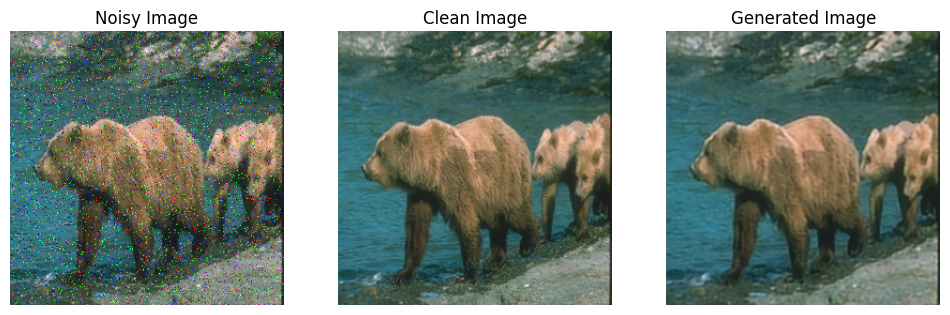

PSNR Noisy: 18.53, PSNR Generated: 37.66


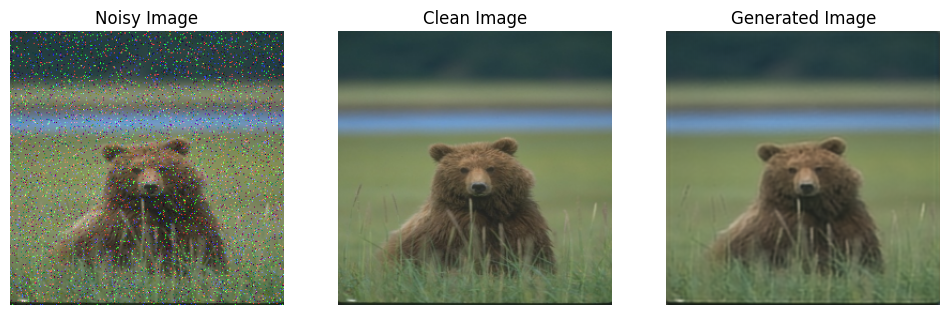

PSNR Noisy: 17.57, PSNR Generated: 25.97


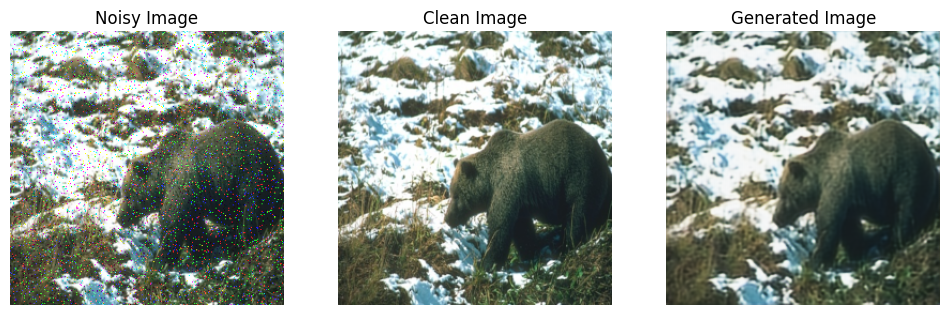

PSNR Noisy: 18.31, PSNR Generated: 33.52


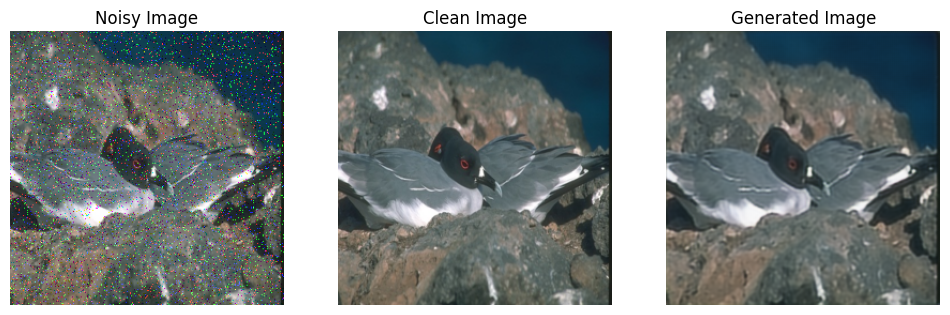

PSNR Noisy: 18.57, PSNR Generated: 32.35


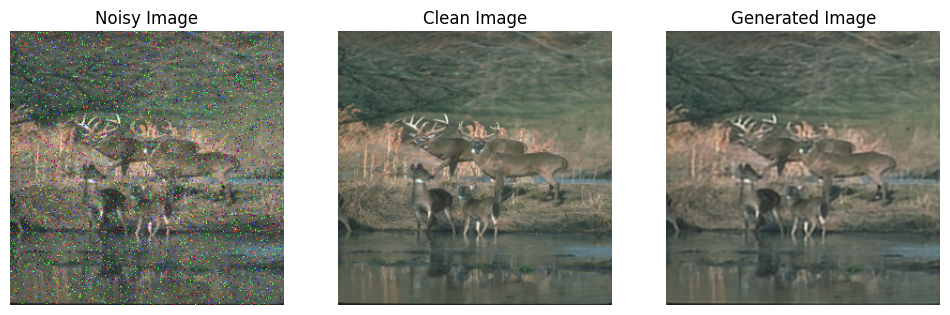

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
import cv2

# Configuration du périphérique
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset pour le débruitage avec bruit sel et poivre
class DenoisingDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = [
            os.path.join(root_dir, img) for img in os.listdir(root_dir)
            if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))
        ]
        if not self.image_paths:
            raise ValueError(f"Aucune image valide trouvée dans le répertoire: {root_dir}")
        self.transform = transform

    def add_salt_and_pepper_noise(self, image, prob_sp=0.05):
        # Bruit sel et poivre
        salt_pepper = torch.rand_like(image)
        noisy_image = image.clone()
        noisy_image[salt_pepper < (prob_sp / 2)] = 0  # Sel (noir)
        noisy_image[salt_pepper > 1 - (prob_sp / 2)] = 1  # Poivre (blanc)
        return noisy_image

    def median_filter(self, noisy_image, kernel_size=3):
        # Appliquer le filtre médian
        noisy_image_np = noisy_image.permute(1, 2, 0).numpy()
        filtered_image_np = cv2.medianBlur((noisy_image_np * 255).astype(np.uint8), kernel_size)
        filtered_image = torch.tensor(filtered_image_np / 255.0, dtype=torch.float32).permute(2, 0, 1)
        return filtered_image

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        noisy_image = self.add_salt_and_pepper_noise(image)
        noisy_image_filtered = self.median_filter(noisy_image)
        return noisy_image, noisy_image_filtered, image


# Transformations pour le dataset
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Chargement du dataset BSD500
train_dataset = DenoisingDataset(root_dir='archive/images/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Définition du générateur (CGNet complet)
class CGNet(nn.Module):
    def __init__(self):
        super(CGNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True)
        )

        self.middle = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.middle(x)
        x = self.decoder(x)
        return x

# Fonction de perte basée sur les hautes fréquences
def high_frequency_loss(input_image, target_image):
    kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    kernel = torch.tensor(kernel, dtype=torch.float32, device=device).unsqueeze(0).unsqueeze(0)

    input_high = []
    target_high = []

    for channel in range(3):
        input_channel = input_image[:, channel:channel+1, :, :]
        target_channel = target_image[:, channel:channel+1, :, :]

        input_high_channel = nn.functional.conv2d(input_channel, kernel, padding=1)
        target_high_channel = nn.functional.conv2d(target_channel, kernel, padding=1)

        input_high.append(input_high_channel)
        target_high.append(target_high_channel)

    input_high = torch.cat(input_high, dim=1)
    target_high = torch.cat(target_high, dim=1)

    return nn.MSELoss()(input_high, target_high)

# Initialisation du générateur
generator = CGNet().to(device)

# Critères et optimiseurs
pixelwise_loss = nn.MSELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)

# Entraînement
num_epochs = 100
for epoch in range(num_epochs):
    generator.train()
    for noisy_imgs, noisy_imgs_filtered, clean_imgs in tqdm(train_loader):
        noisy_imgs_filtered = noisy_imgs_filtered.to(device)
        clean_imgs = clean_imgs.to(device)

        optimizer_G.zero_grad()
        generated_imgs = generator(noisy_imgs_filtered)

        g_loss_pixelwise = pixelwise_loss(generated_imgs, clean_imgs)
        g_loss_high_freq = high_frequency_loss(generated_imgs, clean_imgs)
        g_loss = g_loss_pixelwise + 0.1 * g_loss_high_freq

        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] | Generator Loss: {g_loss.item():.4f}")

# Sauvegarde du modèle
torch.save(generator.state_dict(), 'cgnet_sel_et_poivre.pth')

# Fonction pour afficher les échantillons
def show_sample_with_metrics(generator, dataset, index):
    generator.eval()

    noisy_img, noisy_img_filtered, clean_img = dataset[index]
    noisy_img = noisy_img.unsqueeze(0).to(device)
    noisy_img_filtered = noisy_img_filtered.unsqueeze(0).to(device)
    clean_img = clean_img.unsqueeze(0).to(device)

    with torch.no_grad():
        generated_img = generator(noisy_img_filtered)

    psnr_noisy = psnr(clean_img.squeeze().permute(1, 2, 0).cpu().numpy(), noisy_img.squeeze().permute(1, 2, 0).cpu().numpy())
    psnr_generated = psnr(clean_img.squeeze().permute(1, 2, 0).cpu().numpy(), generated_img.squeeze().permute(1, 2, 0).cpu().numpy())

    print(f"PSNR Noisy: {psnr_noisy:.2f}, PSNR Generated: {psnr_generated:.2f}")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Noisy Image")
    plt.imshow(noisy_img.squeeze().permute(1, 2, 0).cpu().numpy())
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Clean Image")
    plt.imshow(clean_img.squeeze().permute(1, 2, 0).cpu().numpy())
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Generated Image")
    plt.imshow(generated_img.squeeze().permute(1, 2, 0).cpu().numpy())
    plt.axis('off')

    plt.show()

for idx in range(5):
    show_sample_with_metrics(generator, train_dataset, idx)
